In [1]:
import cv2
import math
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

In [99]:
def read_image_rgb(path_to_image):
    return cv2.cvtColor(cv2.imread(path_to_image), cv2.COLOR_BGR2RGB)

def create_gradient_image(size, offset, min_value=0, max_value=1):    
    gradient = np.concatenate((np.full(shape=int(offset/2),fill_value=min_value,dtype=np.double),
                               np.linspace(min_value, max_value, size-offset, endpoint=False),
                               np.full(shape=int(offset/2),fill_value=max_value,dtype=np.double)))
    gradient = np.tile(gradient, (size, 1))*255
    return gradient


def display_image(image, title='Image'):
    plt.imshow(image)
    plt.title(title)
    plt.show()
    
def show_1d_hist(image,channel=0):
    matplotlib.rcParams['figure.figsize'] = [5, 5]
    hist = cv2.calcHist([image],[channel],None,[256],[0,256])
    plt.plot(hist)
    plt.show()
    
def gaussian_blur(image, kernel_size=5, sigma=0):
    return cv2.GaussianBlur(image, (kernel_size,kernel_size), sigma)
    
    
def display_image_list(images, n_cols=5, labels=None):
    matplotlib.rcParams['figure.figsize'] = [10, 10]
    if (labels==None):
        labels = [str(l) for l in range(len(images))]
        
    n_rows = math.ceil(len(images)/n_cols)
    
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
    ax = axes.ravel()

    for i in range(0,len(images)):
        ax[i].imshow(images[i],cmap='gray')
        ax[i].set_title(labels[i])
        ax[i].axis('off')
    plt.show()



def sharpen_image(image):
    return cv2.filter2D(image, -1, np.array([[0,-1,0], [-1,5,-1], [0,-1,0]]))

def canny_segmentation(img, low_threshold=100, high_threshold=200):
    edges = cv2.Canny(img, low_threshold, high_threshold)
    return edges

def get_bounding_box(image,thresh=0.95):
    nonzero_indices = np.nonzero(image.T)
    min_row, max_row = np.min(nonzero_indices[0]), np.max(nonzero_indices[0])
    min_col, max_col = np.min(nonzero_indices[1]), np.max(nonzero_indices[1])
    box_size = max_row - min_row + 1, max_col - min_col + 1
    box_size_thresh = (int(box_size[0] * thresh), int(box_size[1] * thresh))
    #box_size_thresh = (int(box_size[0]), int(box_size[1]))
    #coordinates of the box that contains 95% of the highest pixel values
    top_left = (min_row + int((box_size[0] - box_size_thresh[0]) / 2), min_col + int((box_size[1] - box_size_thresh[1]) / 2))
    bottom_right = (top_left[0] + box_size_thresh[0], top_left[1] + box_size_thresh[1])
    return (top_left[0], top_left[1]), (bottom_right[0], bottom_right[1])

def is_blurry(image, thresh = 100, crop_edges_thresh = 0.95, canny_thresh_low = 100, canny_thresh_high = 200):
    if (len(image.shape)<3):
        gray = image
    else:        
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
    
    gray = sharpen_image(gray)
    seg= canny_segmentation(gray,canny_thresh_low,canny_thresh_high)
    bb_thresh = get_bounding_box(seg,crop_edges_thresh)
    im_crop = gray[bb_thresh[0][1]:bb_thresh[1][1],bb_thresh[0][0]:bb_thresh[1][0]]      
    edges = cv2.Laplacian(gray, cv2.CV_64F)    
    return edges.var() < thresh

In [100]:
image_list = ['1.jpg','2.png','3.png','4.png','5.jpg']
imgs = [read_image_rgb(img_path) for img_path in image_list]

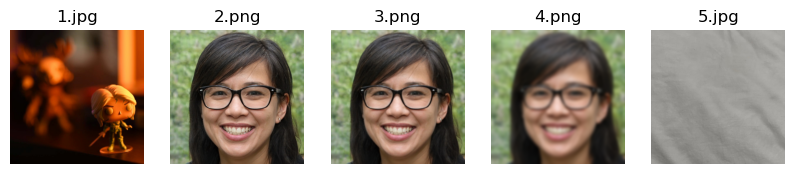

In [101]:
display_image_list(imgs,labels=image_list)

((672, 486), (797, 721))
Original image
Laplacian variance 7.712038454865489
Crop Laplacian variance 54.92772452592122


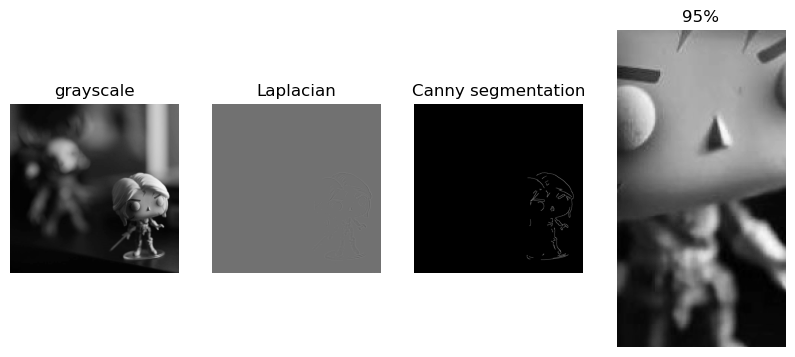

In [102]:
imgg = imgs[0]

gray = cv2.cvtColor(imgg, cv2.COLOR_RGB2GRAY)
edges = cv2.Laplacian(gray, cv2.CV_64F)
seg= canny_segmentation(gray)
bb_thresh = get_bounding_box(seg,0.5)
print(bb_thresh)
im_crop = gray[bb_thresh[0][1]:bb_thresh[1][1],bb_thresh[0][0]:bb_thresh[1][0]]  


print('Original image')
print(f'Laplacian variance {edges.var()}')    
print(f'Crop Laplacian variance {cv2.Laplacian(im_crop, cv2.CV_64F).var()}') 
display_image_list([gray,edges,seg,im_crop],4,['grayscale','Laplacian','Canny segmentation','95%'])

Original image
Laplacian variance 7.712038454865489
Crop Laplacian variance 54.92772452592122


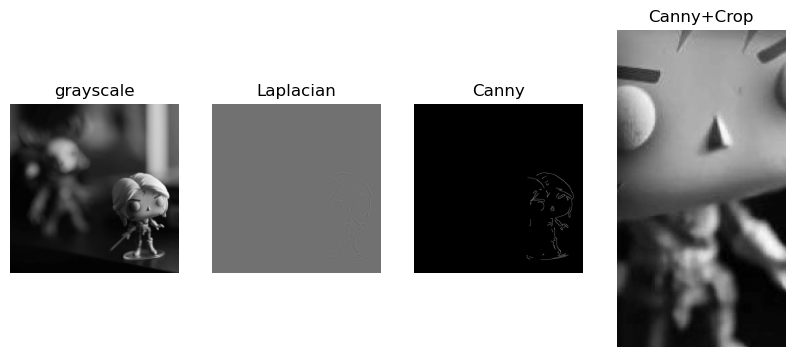

Sharepned image
Laplacian variance 135.96897986498615
Crop Laplacian variance 731.6405725035473


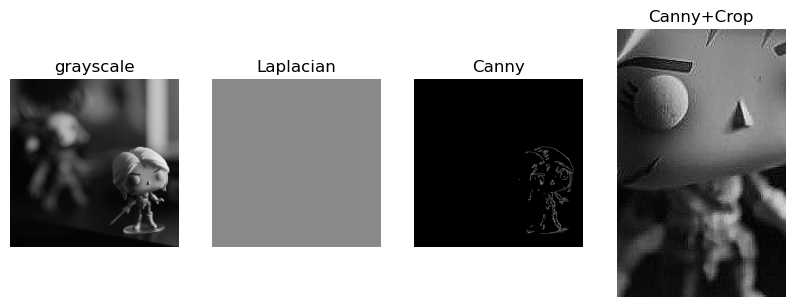

...
Original image
Laplacian variance 465.60988518617745
Crop Laplacian variance 860.9341379407919


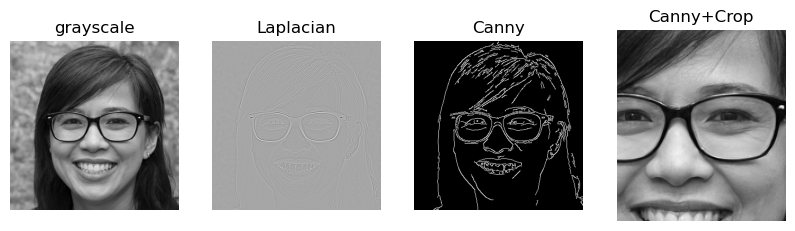

Sharepned image
Laplacian variance 9593.34669000236
Crop Laplacian variance 13162.247781126904


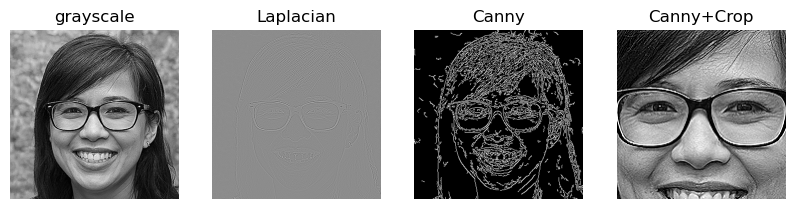

...
Original image
Laplacian variance 77.46953333774832
Crop Laplacian variance 169.20519580022398


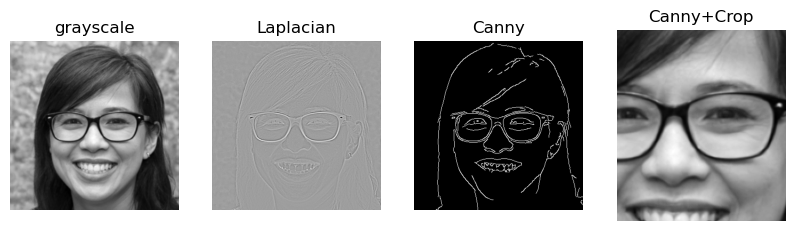

Sharepned image
Laplacian variance 709.2873145035343
Crop Laplacian variance 1311.3977805866282


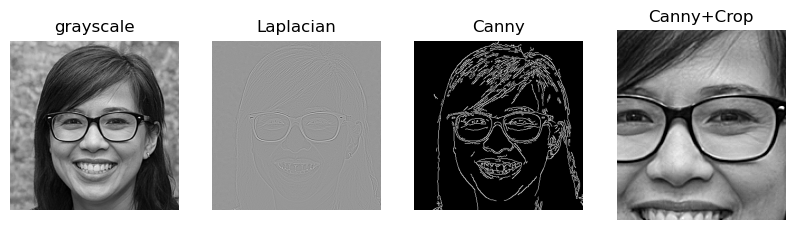

...
Original image
Laplacian variance 3.6220038161345762
Crop Laplacian variance 30.96233055555555


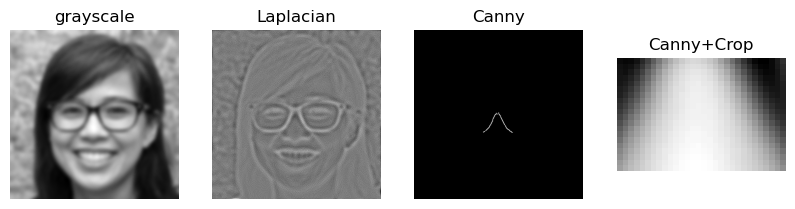

Sharepned image
Laplacian variance 50.834444145548986
Crop Laplacian variance 58.165674795956896


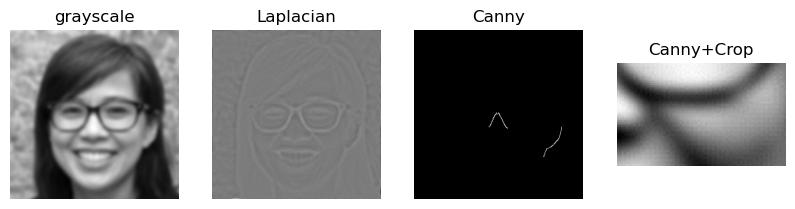

...
Original image
Laplacian variance 54.72176912381247
Crop Laplacian variance 74.94266814654995


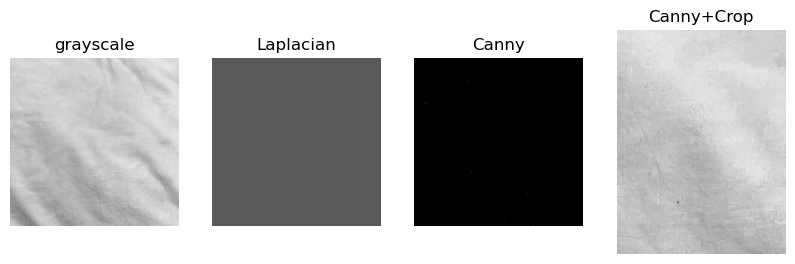

Sharepned image
Laplacian variance 1287.164655937183
Crop Laplacian variance 1387.9584324895413


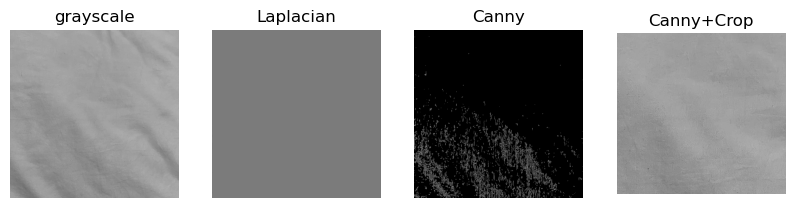

...


In [104]:
for img in imgs:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Laplacian(gray, cv2.CV_64F)
    seg= canny_segmentation(gray)
    bb_thresh = get_bounding_box(seg,0.5)
    im_crop = gray[bb_thresh[0][1]:bb_thresh[1][1],bb_thresh[0][0]:bb_thresh[1][0]]  
    
    
    print('Original image')
    print(f'Laplacian variance {edges.var()}')    
    print(f'Crop Laplacian variance {cv2.Laplacian(im_crop, cv2.CV_64F).var()}') 
    display_image_list([gray,edges,seg,im_crop],4,['grayscale','Laplacian','Canny','Canny+Crop'])
    
    
    
    
    gray = cv2.cvtColor(cv2.filter2D(img, -1, np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])), cv2.COLOR_RGB2GRAY)
    edges = cv2.Laplacian(gray, cv2.CV_64F)
    seg= canny_segmentation(gray)
    bb_thresh = get_bounding_box(seg,0.5)
    im_crop = gray[bb_thresh[0][1]:bb_thresh[1][1],bb_thresh[0][0]:bb_thresh[1][0]]
    

    print('Sharepned image')
    print(f'Laplacian variance {edges.var()}')    
    print(f'Crop Laplacian variance {cv2.Laplacian(im_crop, cv2.CV_64F).var()}') 
    display_image_list([gray,edges,seg,im_crop],4,['grayscale','Laplacian','Canny','Canny+Crop'])
    print('...')

434.1442277317401
167.85731031744217
104.78787197521888
58.58345339538937
39.085536912767566


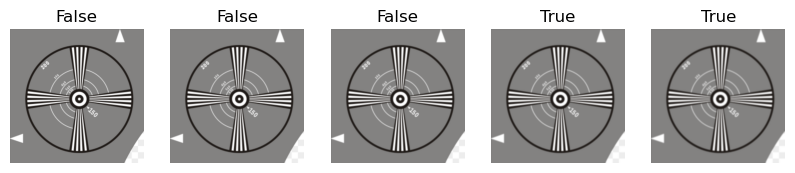

In [16]:
img = read_image_rgb('EIA1956Crop.png')

processed_images = []
image_is_blurry = []

for i in [1,3,5,7,9]:
    processed_images.append(gaussian_blur(img,i))
    isblur, _ = is_blurry(processed_images[-1])
    image_is_blurry.append(isblur)
    
display_image_list(processed_images,n_cols=5,labels=image_is_blurry)

434.1442277317401


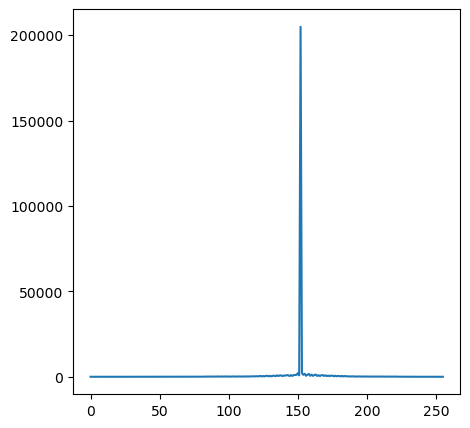

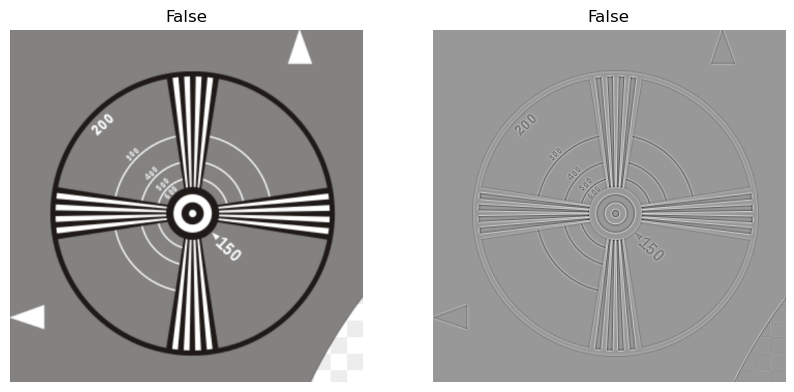

167.85731031744217


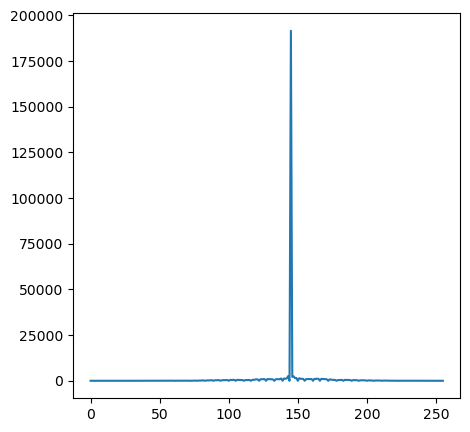

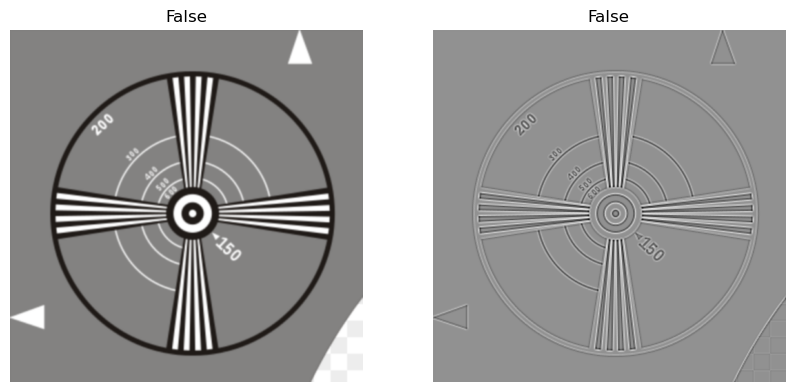

104.78787197521888


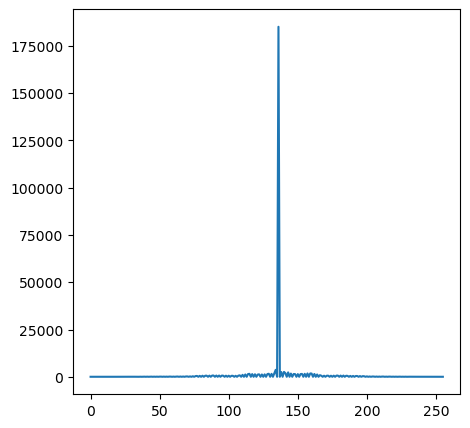

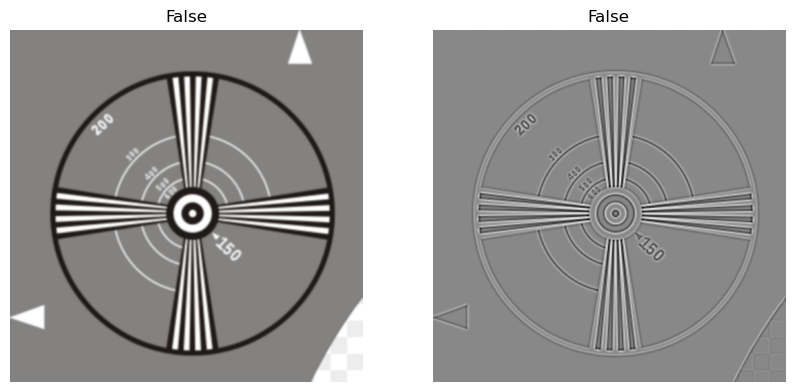

58.58345339538937


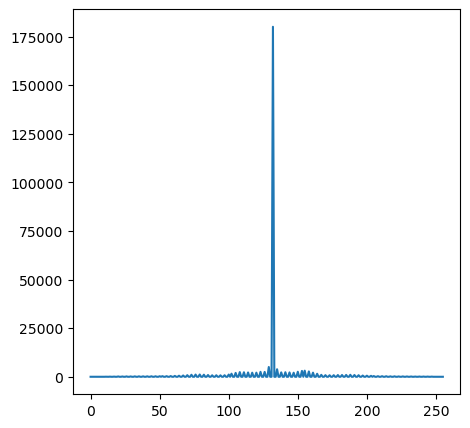

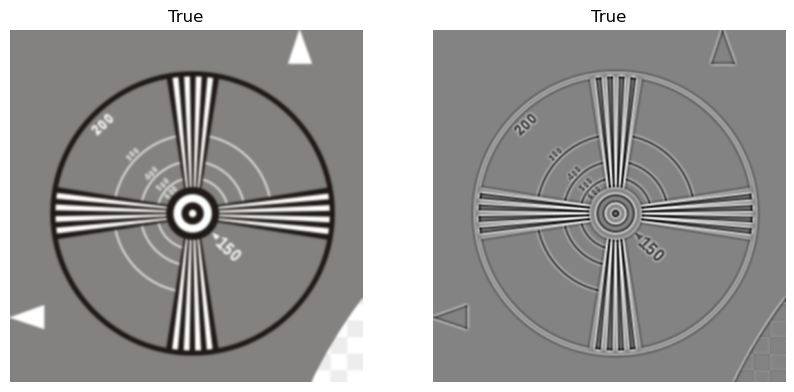

39.085536912767566


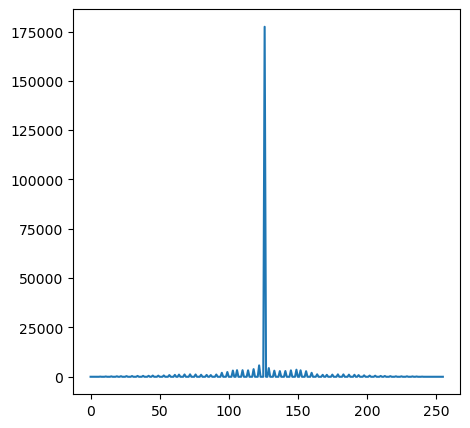

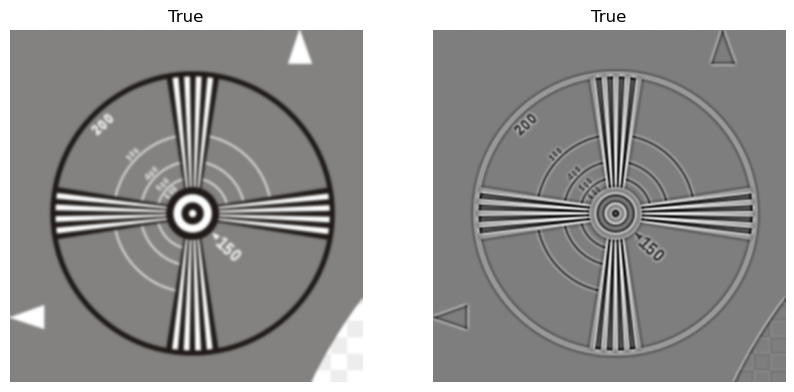

In [17]:
img = read_image_rgb('EIA1956Crop.png')

processed_images = []
image_is_blurry = []

for i in [1,3,5,7,9]:
    processed_images.append(gaussian_blur(img,i))
    is_blur, edge = is_blurry(processed_images[-1])
    
    processed_images.append(edge)
    
    image_is_blurry.append(is_blur)
    image_is_blurry.append(is_blur)
    show_1d_hist(cv2.normalize(processed_images[-1],None, 0, 256,cv2.NORM_MINMAX).astype(np.uint8))
    display_image_list(processed_images[-2:],n_cols=2,labels=image_is_blurry[-2:])
    
#display_image_list(processed_images,n_cols=6,labels=image_is_blurry)

623.9056444861344


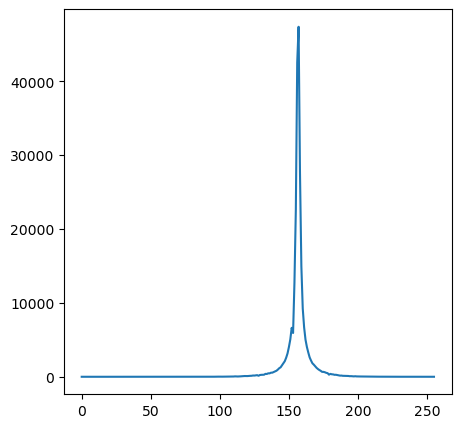

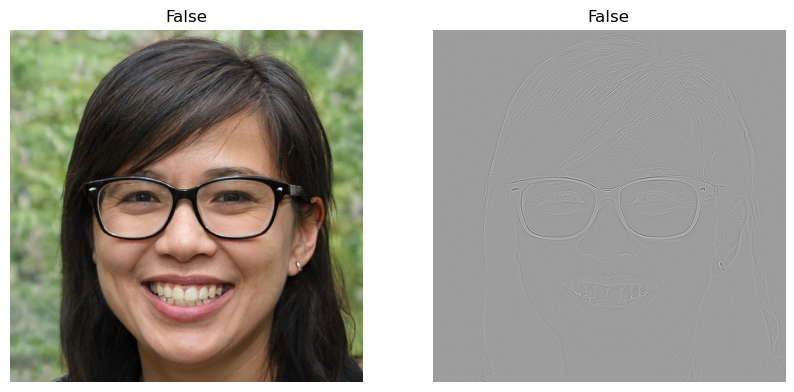

56.96636404177116


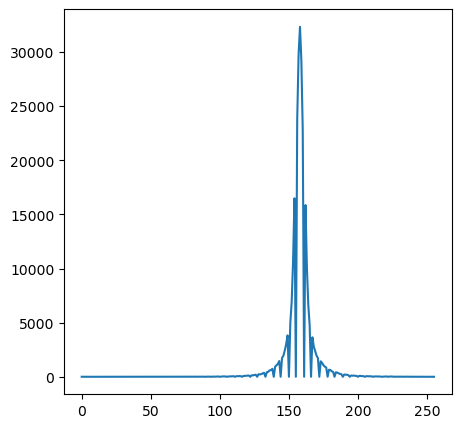

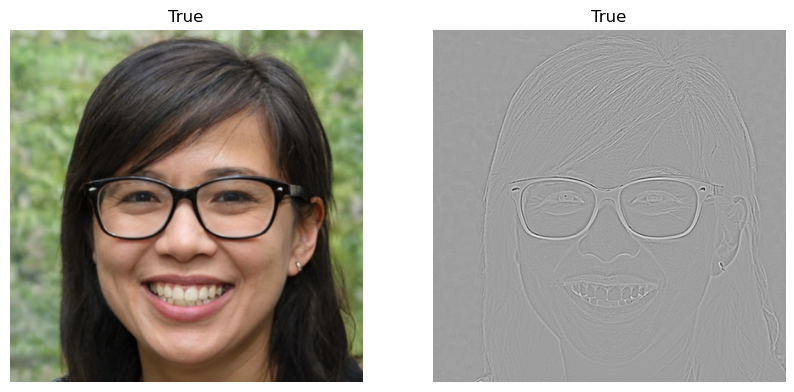

24.50964646715147


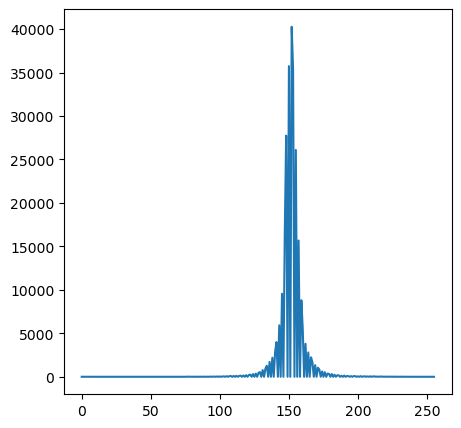

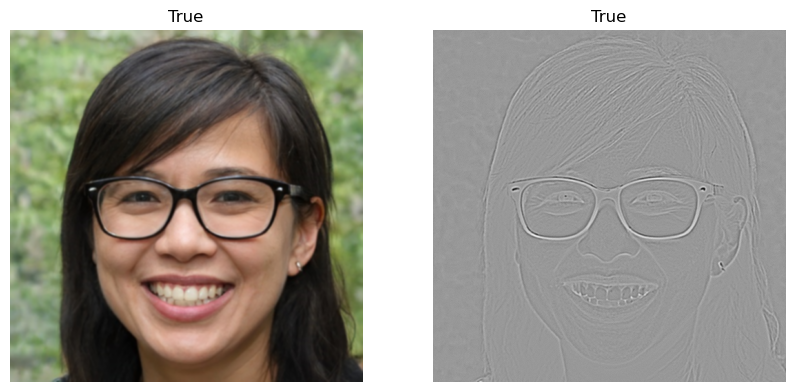

11.105990230789757


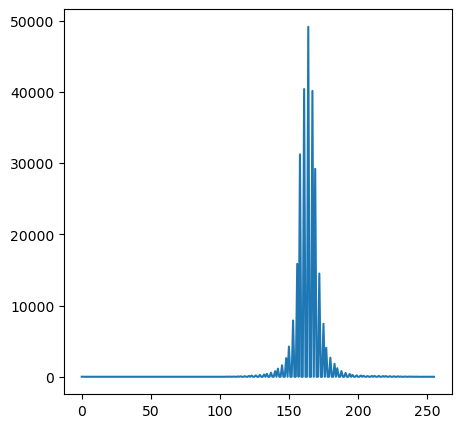

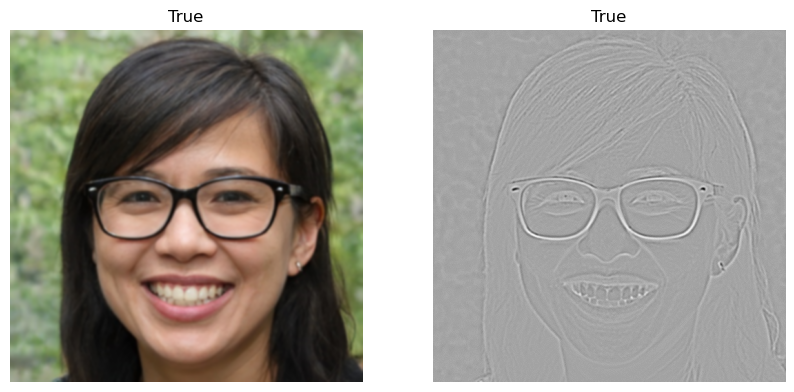

7.367720827460289


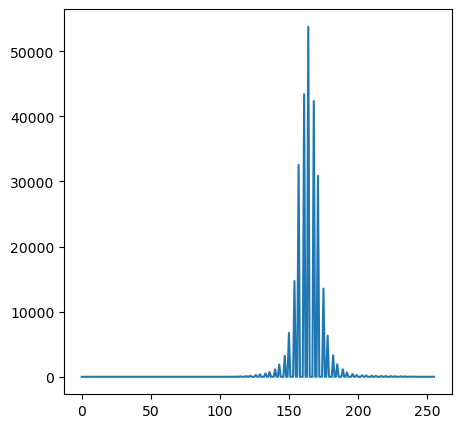

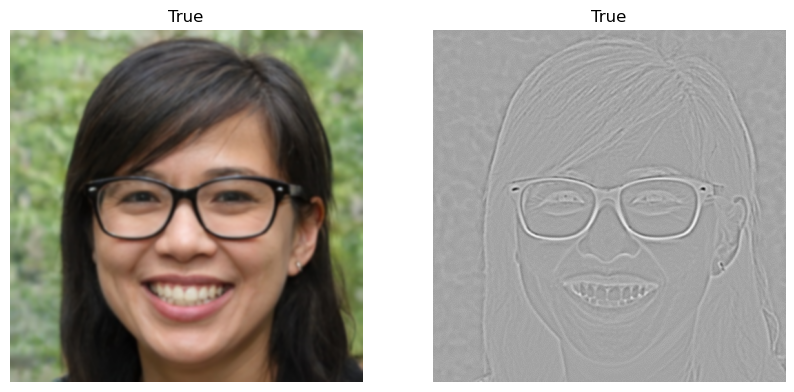

In [20]:
img = read_image_rgb('FaceImage.png')

processed_images = []
image_is_blurry = []

for i in [1,3,5,7,9]:
    processed_images.append(gaussian_blur(img,i))
    is_blur, edge = is_blurry(processed_images[-1])
    
    processed_images.append(edge)
    
    image_is_blurry.append(is_blur)
    image_is_blurry.append(is_blur)
    show_1d_hist(cv2.normalize(processed_images[-1],None, 0, 256,cv2.NORM_MINMAX).astype(np.uint8))
    display_image_list(processed_images[-2:],n_cols=2,labels=image_is_blurry[-2:])
    
#display_image_list(processed_images,n_cols=6,labels=image_is_blurry)

19.72244529792219


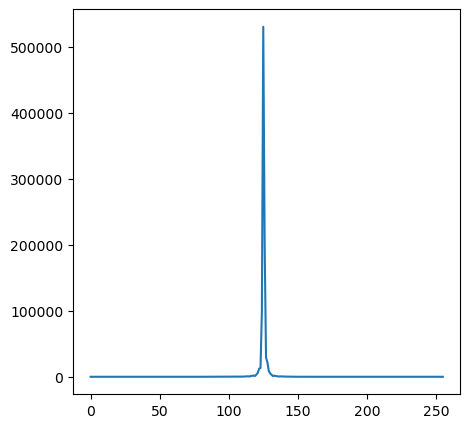

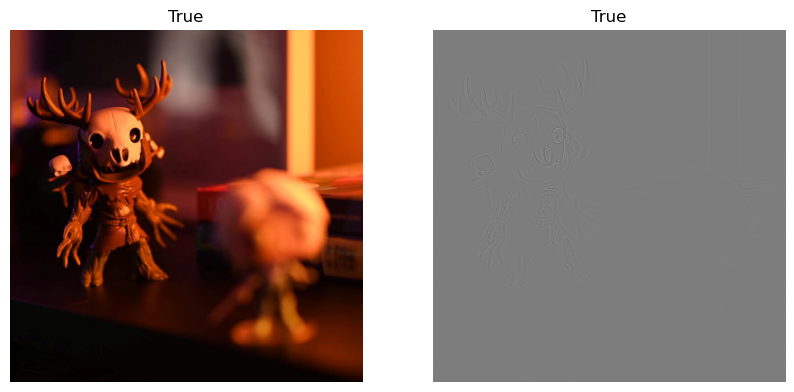

6.698296220028803


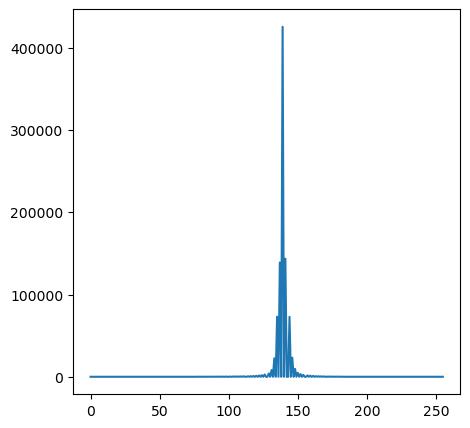

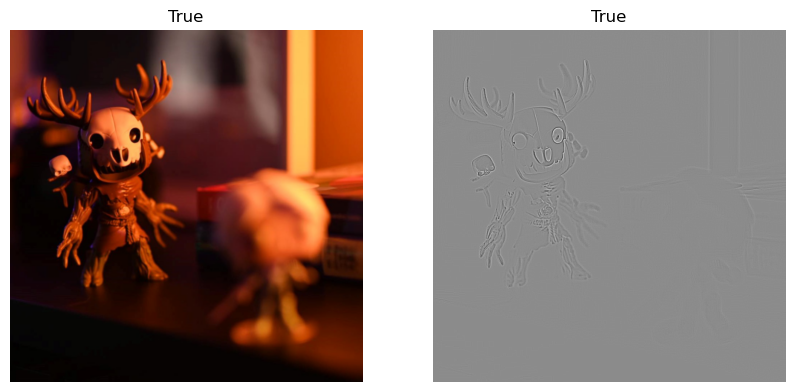

4.56897904378575


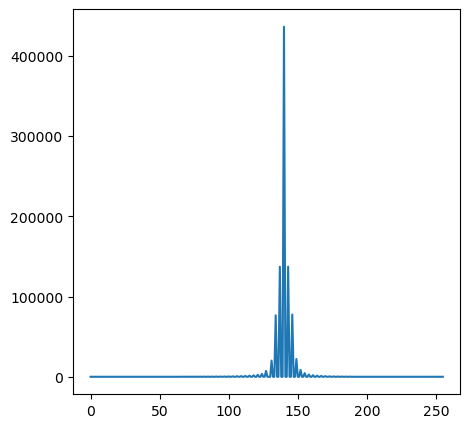

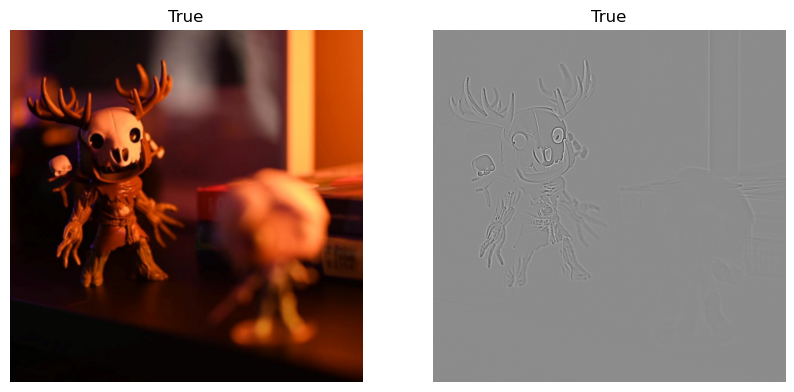

3.1737317559092206


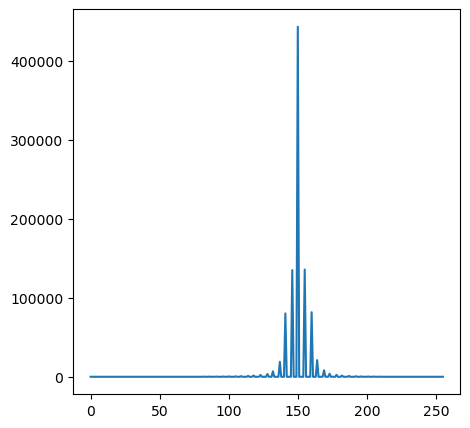

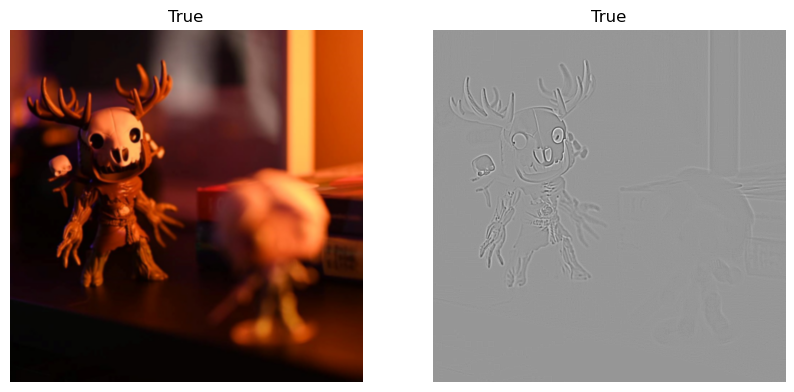

2.6119195958935406


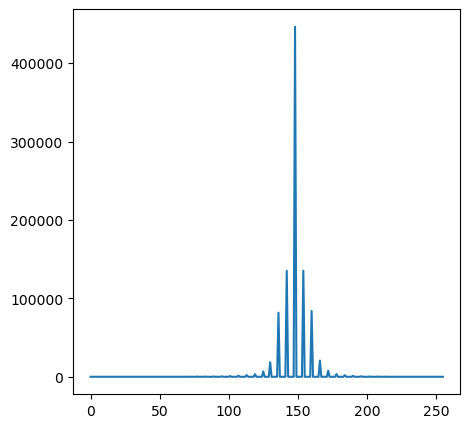

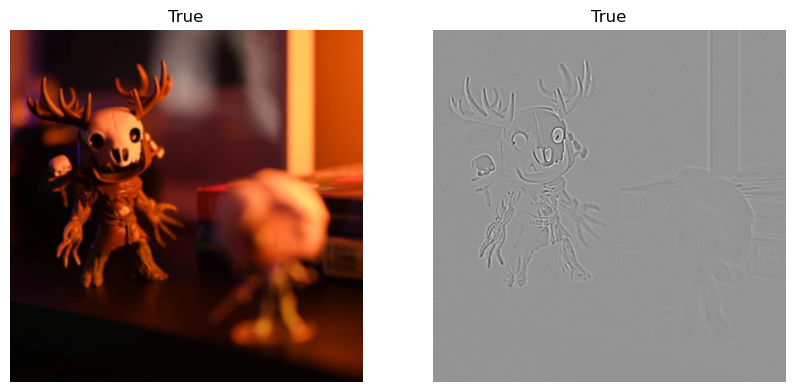

In [21]:
img = read_image_rgb('1x.jpg')

processed_images = []
image_is_blurry = []

for i in [1,3,5,7,9]:
    processed_images.append(gaussian_blur(img,i))
    is_blur, edge = is_blurry(processed_images[-1])
    
    processed_images.append(edge)
    
    image_is_blurry.append(is_blur)
    image_is_blurry.append(is_blur)
    show_1d_hist(cv2.normalize(processed_images[-1],None, 0, 256,cv2.NORM_MINMAX).astype(np.uint8))
    display_image_list(processed_images[-2:],n_cols=2,labels=image_is_blurry[-2:])
    
#display_image_list(processed_images,n_cols=6,labels=image_is_blurry)

7.712038454865489
7.712038454865489


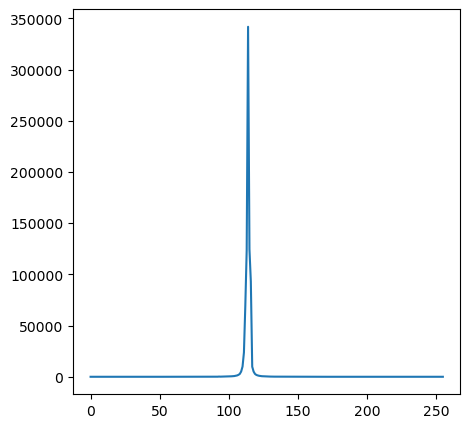

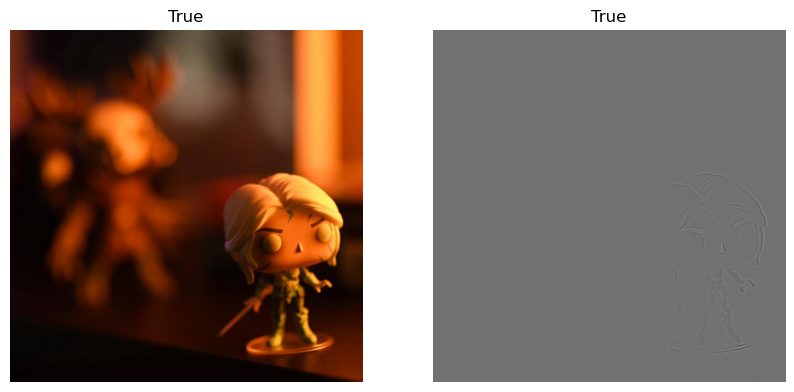

3.4279538181029663
3.4279538181029663


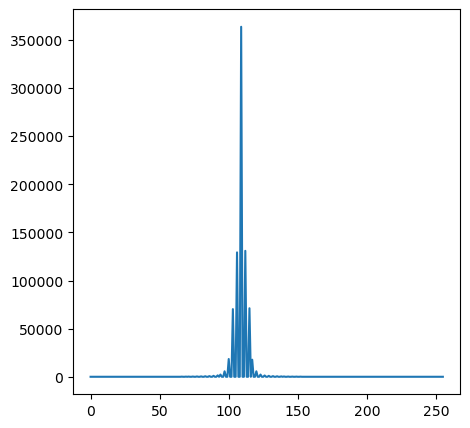

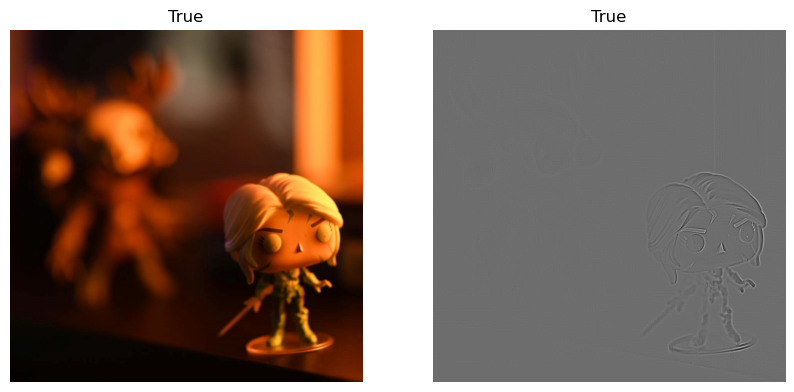

2.7566953337180085
2.7566953337180085


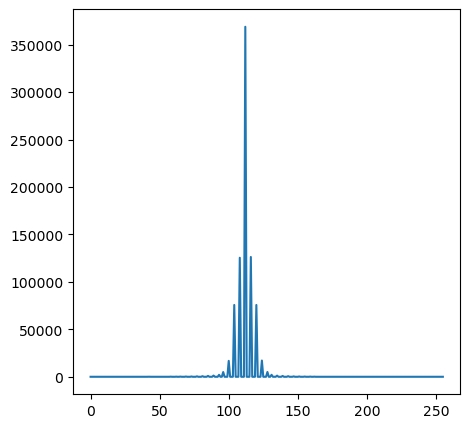

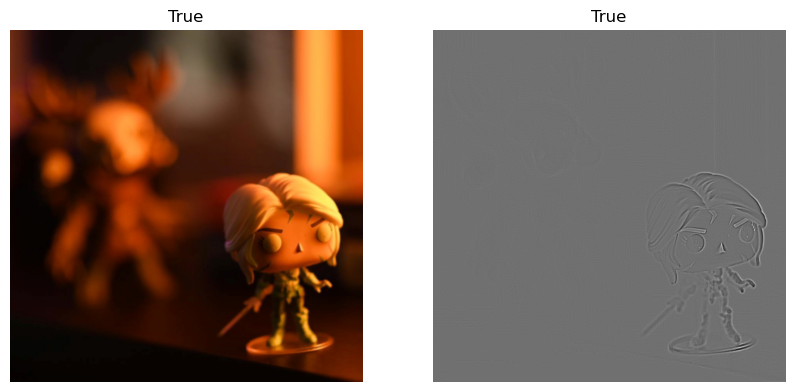

2.262943750194367
2.262943750194367


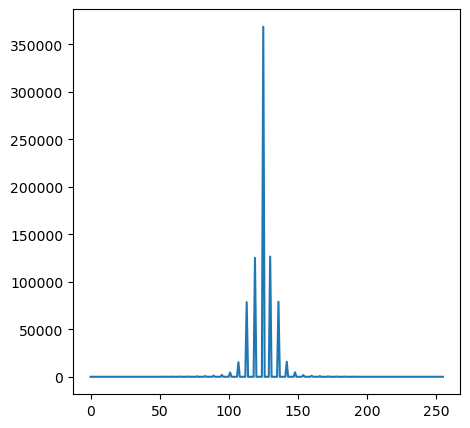

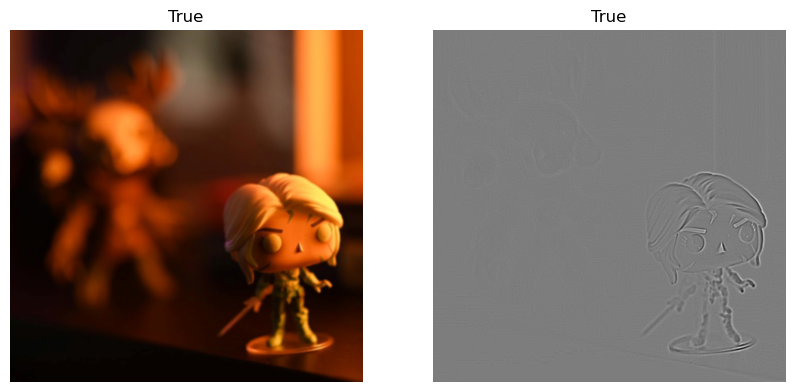

2.0310442574629666
2.0310442574629666


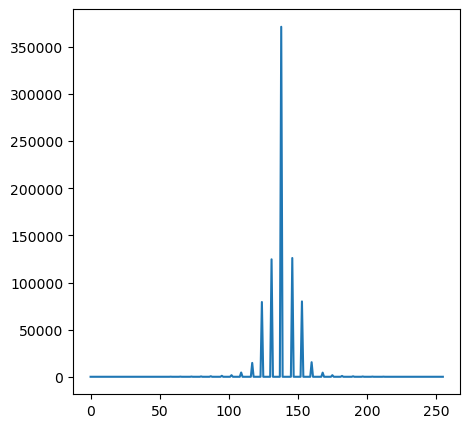

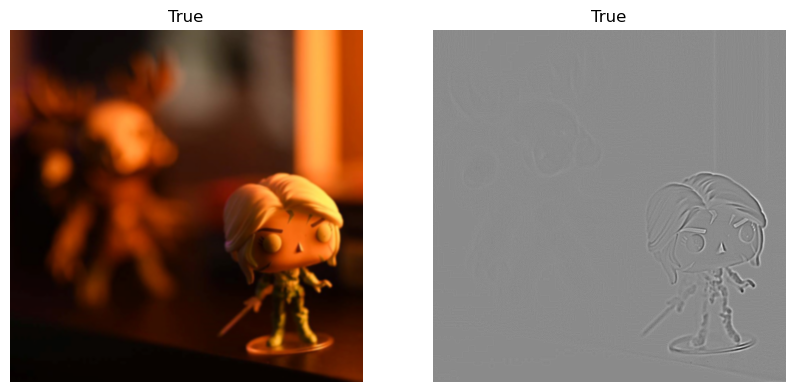

In [24]:
img = read_image_rgb('2x.jpg')

processed_images = []
image_is_blurry = []

for i in [1,3,5,7,9]:
    processed_images.append(gaussian_blur(img,i))
    is_blur, edge = is_blurry(processed_images[-1])
    
    processed_images.append(edge)
    
    image_is_blurry.append(is_blur)
    image_is_blurry.append(is_blur)
    print(processed_images[-1].var())
    show_1d_hist(cv2.normalize(processed_images[-1],None, 0, 256,cv2.NORM_MINMAX).astype(np.uint8))
    display_image_list(processed_images[-2:],n_cols=2,labels=image_is_blurry[-2:])
    
#display_image_list(processed_images,n_cols=6,labels=image_is_blurry)

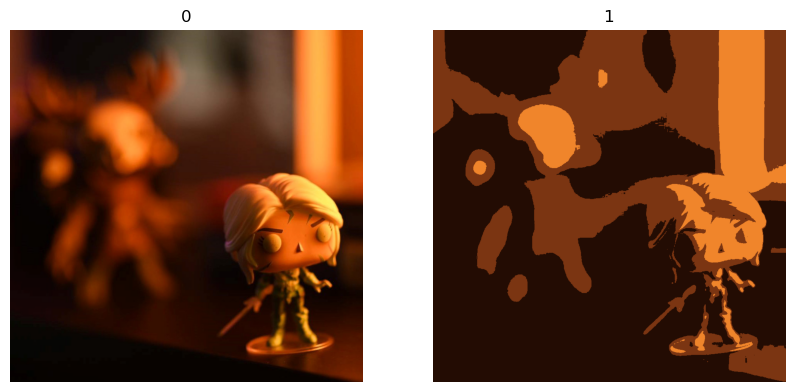

In [35]:
img = read_image_rgb('2x.jpg')

def kmeans_segmentation(img, k=3, iterations=10):
    h, w = img.shape[:2]
    data = img.reshape((-1, 3))
    data = np.float32(data)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, iterations, 1.0)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape((img.shape))
    return result


seg= kmeans_segmentation(img,3,100)

display_image_list([img, seg],n_cols=2)

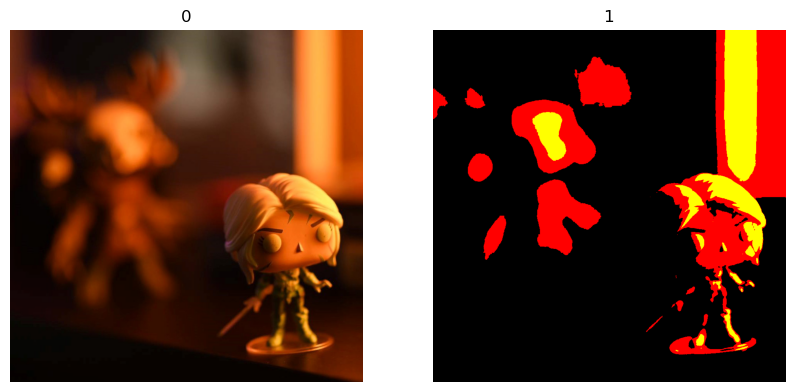

In [19]:
def threshold_segmentation(img, threshold=127):
    _, binary = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    return binary




img = read_image_rgb('1.jpg')

seg= threshold_segmentation(img)

display_image_list([img, seg],n_cols=2)

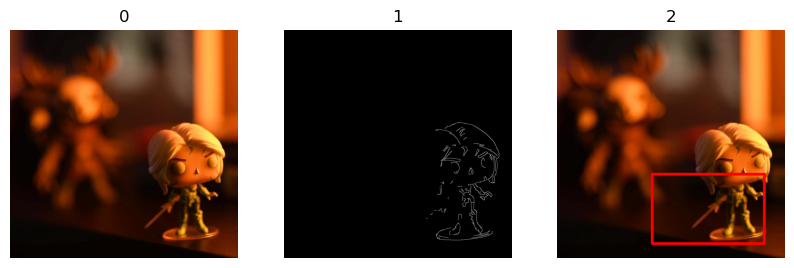

In [46]:
def canny_segmentation(img, low_threshold=100, high_threshold=200):
    edges = cv2.Canny(img, low_threshold, high_threshold)
    return edges

def get_bounding_box(image,thresh=0.95):
    nonzero_indices = np.nonzero(image)
    min_row, max_row = np.min(nonzero_indices[0]), np.max(nonzero_indices[0])
    min_col, max_col = np.min(nonzero_indices[1]), np.max(nonzero_indices[1])
    box_size = max_row - min_row + 1, max_col - min_col + 1
    box_size_thresh = (int(box_size[0] * thresh), int(box_size[1] * thresh))

    #coordinates of the box that contains 95% of the highest pixel values
    top_left = (min_row + int((box_size[0] - box_size_thresh[0]) / 2), min_col + int((box_size[1] - box_size_thresh[1]) / 2))
    bottom_right = (top_left[0] + box_size_thresh[0], top_left[1] + box_size_thresh[1])
    
    return (top_left[0], top_left[1]), (bottom_right[0], bottom_right[1])

img = read_image_rgb('1.jpg')
img2 = read_image_rgb('1.jpg')

seg= canny_segmentation(img)
bounding_box_sharp = get_bounding_box(seg,.5)
cv2.rectangle(img2, bounding_box[0], bounding_box[1], 255, 10)
display_image_list([img, seg,img2],n_cols=3)

In [48]:
seg

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

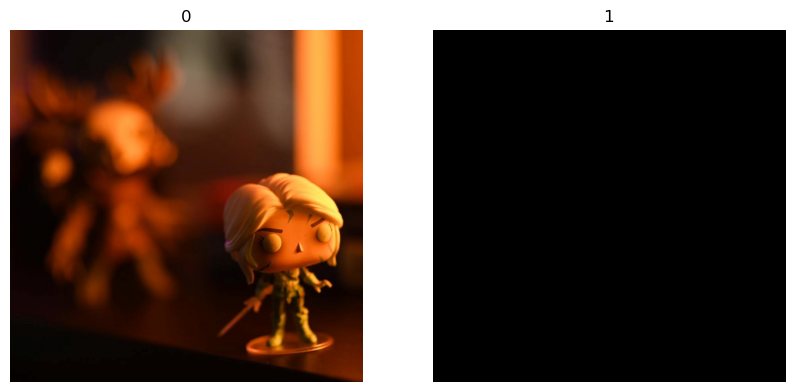

In [44]:
def connected_components_segmentation(img):
    _, labels, stats, centroids = cv2.connectedComponentsWithStats(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
    return labels


seg= connected_components_segmentation(img)

display_image_list([img, seg],n_cols=2)

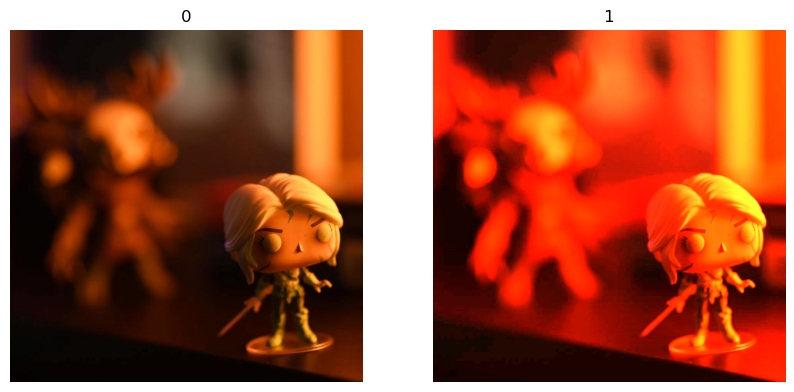

In [45]:
def auto_white_balance(img):
    avg_color_per_row = np.average(img, axis=0)
    avg_color = np.average(avg_color_per_row, axis=0)
    avg_color = avg_color[::-1]  # BGR to RGB conversion
    balance_factor = np.mean(avg_color)
    img = img * balance_factor / avg_color
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

seg= auto_white_balance(img)

display_image_list([img, seg],n_cols=2)